In \[1\]:

    import os
    import cv2
    import pickle
    import keras
    import numpy as np
    import matplotlib
    from keras.layers import Dense
    import matplotlib.pyplot as plt
    from keras.optimizers import Adam
    from keras.models import Sequential
    from keras.layers import Dropout,Flatten
    from keras.utils.np_utils import to_categorical
    from sklearn.model_selection import train_test_split
    from keras.preprocessing.image import ImageDataGenerator
    from keras.layers.convolutional import Conv2D,MaxPooling2D

    Using TensorFlow backend.

In \[2\]:

    #PARAMETERS 
    path = 'G:/Research/Active vs Drowsiness/0 FaceImages'
    testRatio = 0.18
    valRatio = 0.17
    imageDimensions= (100,100,3)
    batchSizeVal= 64
    epochsVal = 50

In \[3\]:

    #### IMPORTING DATA/IMAGES FROM FOLDERS 
    count = 0
    images = []     # LIST CONTAINING ALL THE IMAGES 
    classNo = []    # LIST CONTAINING ALL THE CORRESPONDING CLASS ID OF IMAGES 
    myList = os.listdir(path)
    print("Total Classes Detected:",len(myList))

    Total Classes Detected: 2

In \[4\]:

    noOfClasses = len(myList)
    print("Importing Classes .......")

    Importing Classes .......

In \[5\]:

    CATEGORIES = ["Fatigue Subjects", "Active Subjects"]

    for category in CATEGORIES:
        myPicList = os.listdir(path+"/"+category)
        class_num = CATEGORIES.index(category)
        for y in myPicList:
            curImg = cv2.imread(path+"/"+category+"/"+y)
            curImg = cv2.resize(curImg,(100,100))
            images.append(curImg)
            classNo.append(class_num)
        
        print(class_num,end= " ")
    print(" ")
    print("Total Images in Images List = ",len(images))
    print("Total IDS in classNo List= ",len(classNo))

    0 1  
    Total Images in Images List =  9120
    Total IDS in classNo List=  9120

In \[6\]:

    #### CONVERT TO NUMPY ARRAY 
    images = np.array(images)
    classNo = np.array(classNo)
    print(images.shape)

    (9120, 100, 100, 3)

In \[7\]:

    #### SPLITTING THE DATA
    X_train,X_test,y_train,y_test = train_test_split(images,classNo,test_size=testRatio)
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=valRatio)
    print(X_train.shape)
    print(X_test.shape)
    print(X_validation.shape)

    (6206, 100, 100, 3)
    (1642, 100, 100, 3)
    (1272, 100, 100, 3)

In \[8\]:

    plt.style.use('seaborn-colorblind')
    labels = ['T r a i n i n g  D a t a', 'V a l i d a t i o n  D a t a', 'T e s t i n g  D a t a']

    numOfSamples1= []
    s=0
    numOfSamples1.append(len(np.where(y_train==s)[0]))
    numOfSamples1.append(len(np.where(y_validation==s)[0]))
    numOfSamples1.append(len(np.where(y_test==s)[0]))
    t=1
    numOfSamples2= []
    numOfSamples2.append(len(np.where(y_train==t)[0]))
    numOfSamples2.append(len(np.where(y_validation==t)[0]))
    numOfSamples2.append(len(np.where(y_test==t)[0]))


    x = np.arange(len(labels))  
    width = 0.4 

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, numOfSamples1, width,color='#ba3d07', label="Fatigue Subjects")
    rects2 = ax.bar(x + width/2, numOfSamples2, width,color='#27bfd6', label='Active Subjects')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('I m a g e s')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

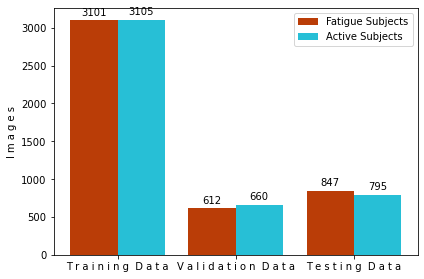

In \[9\]:

    #### PREPOSSESSING FUNCTION FOR IMAGES FOR TRAINING 
    def preProcessing(img):
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = img/255
        return img
    # img = preProcessing(X_train[30])
    # img = cv2.resize(img,(300,300))
    # cv2.imshow("PreProcesssed",img)
    # cv2.waitKey(0)
     
    X_train= np.array(list(map(preProcessing,X_train)))
    X_test= np.array(list(map(preProcessing,X_test)))
    X_validation= np.array(list(map(preProcessing,X_validation)))
     

In \[10\]:

     
    #### RESHAPE IMAGES 
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
    X_validation = X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
     
    #### IMAGE AUGMENTATION 
    dataGen = ImageDataGenerator(horizontal_flip=True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1,
                                 zoom_range=0.2,
                                 shear_range=0.1,
                                 rotation_range=5)
    dataGen.fit(X_train)

In \[11\]:

    #### ONE HOT ENCODING OF MATRICES
    y_train = to_categorical(y_train,noOfClasses)
    y_test = to_categorical(y_test,noOfClasses)
    y_validation = to_categorical(y_validation,noOfClasses)

In \[13\]:

    from keras.layers.convolutional import AveragePooling2D
        #### CREATING THE MODEL 
    def myModel():
        
            # Instantiate an empty sequential model
            model = Sequential()
            # C1 Convolutional Layer
            model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (imageDimensions[0],
                          imageDimensions[1],1), padding = 'same'))
            # S2 Pooling Layer
            model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
            # C3 Convolutional Layer
            model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'relu',padding = 'valid'))
            # S4 Pooling Layer
            model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
            # C5 Convolutional Layer
            model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'relu',padding = 'valid'))
            # Flatten the CNN output to feed it with fully connected layers
            model.add(Flatten())
            # FC6 Fully Connected Layer
            model.add(Dense(units = 84, activation = 'relu'))
            # FC7 Output layer with softmax activation
            model.add(Dense(units = 2, activation = 'sigmoid'))
            Metrics=[keras.metrics.BinaryAccuracy(name='accuracy'), keras.metrics.AUC(name='auc')]
            model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=Metrics)
            #model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
            return model
    model = myModel()
    print(model.summary())
     

    Model: "sequential_2"
    _________________________________________________________________
    Layer (type)                 Output Shape              Param #   
    =================================================================
    conv2d_2 (Conv2D)            (None, 100, 100, 6)       156       
    _________________________________________________________________
    average_pooling2d_1 (Average (None, 50, 50, 6)         0         
    _________________________________________________________________
    conv2d_3 (Conv2D)            (None, 46, 46, 16)        2416      
    _________________________________________________________________
    average_pooling2d_2 (Average (None, 23, 23, 16)        0         
    _________________________________________________________________
    conv2d_4 (Conv2D)            (None, 19, 19, 120)       48120     
    _________________________________________________________________
    flatten_1 (Flatten)          (None, 43320)             0         
    _________________________________________________________________
    dense_1 (Dense)              (None, 84)                3638964   
    _________________________________________________________________
    dense_2 (Dense)              (None, 2)                 170       
    =================================================================
    Total params: 3,689,826
    Trainable params: 3,689,826
    Non-trainable params: 0
    _________________________________________________________________
    None

In \[14\]:

    import tensorflow as tf
    ACCURACY_THRESHOLD = 0.95

    class myCallback(tf.keras.callbacks.Callback): 
        def on_epoch_end(self, epochs, logs={}): 
            if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
                print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
                self.model.stop_training = True
    callbacks = myCallback()

In \[15\]:

    history = model.fit_generator(dataGen.flow(X_train,y_train,
                                     batch_size=batchSizeVal),
                                     epochs=epochsVal,
                                     steps_per_epoch=2000,
                                     validation_data=(X_validation,y_validation),
                                     shuffle=1,
                                     callbacks=[callbacks])

    Epoch 1/50
    2000/2000 [==============================] - 2004s 1s/step - loss: 0.4058 - accuracy: 0.7956 - auc: 0.8926 - val_loss: 0.3635 - val_accuracy: 0.8298 - val_auc: 0.9160
    Epoch 2/50
    2000/2000 [==============================] - 2018s 1s/step - loss: 0.3334 - accuracy: 0.8447 - auc: 0.9309 - val_loss: 0.3418 - val_accuracy: 0.8392 - val_auc: 0.9265
    Epoch 3/50
    2000/2000 [==============================] - 2011s 1s/step - loss: 0.3078 - accuracy: 0.8614 - auc: 0.9418 - val_loss: 0.3273 - val_accuracy: 0.8436 - val_auc: 0.9324
    Epoch 4/50
    2000/2000 [==============================] - 1988s 994ms/step - loss: 0.2836 - accuracy: 0.8755 - auc: 0.9508 - val_loss: 0.2983 - val_accuracy: 0.8640 - val_auc: 0.9458
    Epoch 5/50
    2000/2000 [==============================] - 2017s 1s/step - loss: 0.2562 - accuracy: 0.8915 - auc: 0.9600 - val_loss: 0.2590 - val_accuracy: 0.8876 - val_auc: 0.9593
    Epoch 6/50
    2000/2000 [==============================] - 2019s 1s/step - loss: 0.2350 - accuracy: 0.9007 - auc: 0.9663 - val_loss: 0.3090 - val_accuracy: 0.8774 - val_auc: 0.9493
    Epoch 7/50
    2000/2000 [==============================] - 2019s 1s/step - loss: 0.2191 - accuracy: 0.9078 - auc: 0.9706 - val_loss: 0.2699 - val_accuracy: 0.8884 - val_auc: 0.9588
    Epoch 8/50
    2000/2000 [==============================] - 1992s 996ms/step - loss: 0.2011 - accuracy: 0.9165 - auc: 0.9753 - val_loss: 0.2384 - val_accuracy: 0.9053 - val_auc: 0.9663
    Epoch 9/50
    2000/2000 [==============================] - 2017s 1s/step - loss: 0.1893 - accuracy: 0.9220 - auc: 0.9780 - val_loss: 0.2973 - val_accuracy: 0.8876 - val_auc: 0.9530
    Epoch 10/50
    2000/2000 [==============================] - 2025s 1s/step - loss: 0.1794 - accuracy: 0.9269 - auc: 0.9802 - val_loss: 0.2560 - val_accuracy: 0.9104 - val_auc: 0.9654
    Epoch 11/50
    2000/2000 [==============================] - 2031s 1s/step - loss: 0.1699 - accuracy: 0.9316 - auc: 0.9822 - val_loss: 0.2340 - val_accuracy: 0.9230 - val_auc: 0.9700
    Epoch 12/50
    2000/2000 [==============================] - 1988s 994ms/step - loss: 0.1598 - accuracy: 0.9369 - auc: 0.9841 - val_loss: 0.2953 - val_accuracy: 0.9013 - val_auc: 0.9605
    Epoch 13/50
    2000/2000 [==============================] - 2033s 1s/step - loss: 0.1549 - accuracy: 0.9390 - auc: 0.9850 - val_loss: 0.2251 - val_accuracy: 0.9206 - val_auc: 0.9732
    Epoch 14/50
    2000/2000 [==============================] - 2022s 1s/step - loss: 0.1477 - accuracy: 0.9415 - auc: 0.9864 - val_loss: 0.2022 - val_accuracy: 0.9269 - val_auc: 0.9754
    Epoch 15/50
    2000/2000 [==============================] - 2013s 1s/step - loss: 0.1437 - accuracy: 0.9437 - auc: 0.9871 - val_loss: 0.2159 - val_accuracy: 0.9230 - val_auc: 0.9754
    Epoch 16/50
    2000/2000 [==============================] - 1973s 986ms/step - loss: 0.1390 - accuracy: 0.9460 - auc: 0.9879 - val_loss: 0.2206 - val_accuracy: 0.9269 - val_auc: 0.9759
    Epoch 17/50
    2000/2000 [==============================] - 2042s 1s/step - loss: 0.1349 - accuracy: 0.9469 - auc: 0.9885 - val_loss: 0.2310 - val_accuracy: 0.9308 - val_auc: 0.9720
    Epoch 18/50
    2000/2000 [==============================] - 2033s 1s/step - loss: 0.1300 - accuracy: 0.9488 - auc: 0.9894 - val_loss: 0.1763 - val_accuracy: 0.9410 - val_auc: 0.9811
    Epoch 19/50
    2000/2000 [==============================] - 2010s 1s/step - loss: 0.1262 - accuracy: 0.9508 - auc: 0.9900 - val_loss: 0.2181 - val_accuracy: 0.9340 - val_auc: 0.9755
    Epoch 20/50
    2000/2000 [==============================] - 2021s 1s/step - loss: 0.1238 - accuracy: 0.9512 - auc: 0.9903 - val_loss: 0.2350 - val_accuracy: 0.9289 - val_auc: 0.9741
    Epoch 21/50
    2000/2000 [==============================] - 2032s 1s/step - loss: 0.1215 - accuracy: 0.9523 - auc: 0.9907 - val_loss: 0.2574 - val_accuracy: 0.9261 - val_auc: 0.9709
    Epoch 22/50
    2000/2000 [==============================] - 2081s 1s/step - loss: 0.1192 - accuracy: 0.9540 - auc: 0.9910 - val_loss: 0.2193 - val_accuracy: 0.9340 - val_auc: 0.9765
    Epoch 23/50
    2000/2000 [==============================] - 1981s 990ms/step - loss: 0.1156 - accuracy: 0.9547 - auc: 0.9915 - val_loss: 0.2134 - val_accuracy: 0.9363 - val_auc: 0.9778
    Epoch 24/50
    2000/2000 [==============================] - 2037s 1s/step - loss: 0.1146 - accuracy: 0.9548 - auc: 0.9917 - val_loss: 0.2234 - val_accuracy: 0.9292 - val_auc: 0.9763
    Epoch 25/50
    2000/2000 [==============================] - 2189s 1s/step - loss: 0.1117 - accuracy: 0.9564 - auc: 0.9921 - val_loss: 0.2348 - val_accuracy: 0.9292 - val_auc: 0.9766
    Epoch 26/50
    2000/2000 [==============================] - 2287s 1s/step - loss: 0.1087 - accuracy: 0.9578 - auc: 0.9925 - val_loss: 0.2302 - val_accuracy: 0.9347 - val_auc: 0.9775
    Epoch 27/50
    2000/2000 [==============================] - 2028s 1s/step - loss: 0.1071 - accuracy: 0.9578 - auc: 0.9927 - val_loss: 0.2233 - val_accuracy: 0.9355 - val_auc: 0.9755
    Epoch 28/50
    2000/2000 [==============================] - 2042s 1s/step - loss: 0.1052 - accuracy: 0.9589 - auc: 0.9930 - val_loss: 0.2082 - val_accuracy: 0.9371 - val_auc: 0.9807
    Epoch 29/50
    2000/2000 [==============================] - 2039s 1s/step - loss: 0.1045 - accuracy: 0.9593 - auc: 0.9930 - val_loss: 0.1883 - val_accuracy: 0.9379 - val_auc: 0.9833
    Epoch 30/50
    2000/2000 [==============================] - 2004s 1s/step - loss: 0.1020 - accuracy: 0.9603 - auc: 0.9934 - val_loss: 0.2193 - val_accuracy: 0.9355 - val_auc: 0.9792
    Epoch 31/50
    2000/2000 [==============================] - 2040s 1s/step - loss: 0.1005 - accuracy: 0.9607 - auc: 0.9935 - val_loss: 0.2133 - val_accuracy: 0.9340 - val_auc: 0.9800
    Epoch 32/50
    2000/2000 [==============================] - 2027s 1s/step - loss: 0.0964 - accuracy: 0.9626 - auc: 0.9940 - val_loss: 0.2032 - val_accuracy: 0.9371 - val_auc: 0.9798
    Epoch 33/50
    2000/2000 [==============================] - 2024s 1s/step - loss: 0.0958 - accuracy: 0.9624 - auc: 0.9941 - val_loss: 0.2119 - val_accuracy: 0.9371 - val_auc: 0.9764
    Epoch 34/50
    2000/2000 [==============================] - 1995s 997ms/step - loss: 0.0975 - accuracy: 0.9624 - auc: 0.9939 - val_loss: 0.1899 - val_accuracy: 0.9403 - val_auc: 0.9817
    Epoch 35/50
    2000/2000 [==============================] - 2024s 1s/step - loss: 0.0942 - accuracy: 0.9631 - auc: 0.9943 - val_loss: 0.2285 - val_accuracy: 0.9387 - val_auc: 0.9772
    Epoch 36/50
    2000/2000 [==============================] - 2028s 1s/step - loss: 0.0935 - accuracy: 0.9635 - auc: 0.9944 - val_loss: 0.2219 - val_accuracy: 0.9308 - val_auc: 0.9769
    Epoch 37/50
    2000/2000 [==============================] - 2029s 1s/step - loss: 0.0905 - accuracy: 0.9647 - auc: 0.9947 - val_loss: 0.1990 - val_accuracy: 0.9395 - val_auc: 0.9821
    Epoch 38/50
    2000/2000 [==============================] - 1980s 990ms/step - loss: 0.0908 - accuracy: 0.9646 - auc: 0.9946 - val_loss: 0.2273 - val_accuracy: 0.9458 - val_auc: 0.9805
    Epoch 39/50
    2000/2000 [==============================] - 2027s 1s/step - loss: 0.0889 - accuracy: 0.9651 - auc: 0.9950 - val_loss: 0.2322 - val_accuracy: 0.9403 - val_auc: 0.9790
    Epoch 40/50
    2000/2000 [==============================] - 2029s 1s/step - loss: 0.0876 - accuracy: 0.9660 - auc: 0.9950 - val_loss: 0.2479 - val_accuracy: 0.9340 - val_auc: 0.9768
    Epoch 41/50
    2000/2000 [==============================] - 2039s 1s/step - loss: 0.0867 - accuracy: 0.9660 - auc: 0.9952 - val_loss: 0.2573 - val_accuracy: 0.9336 - val_auc: 0.9756
    Epoch 42/50
    2000/2000 [==============================] - 1980s 990ms/step - loss: 0.0868 - accuracy: 0.9662 - auc: 0.9952 - val_loss: 0.2113 - val_accuracy: 0.9481 - val_auc: 0.9775
    Epoch 43/50
    2000/2000 [==============================] - 2028s 1s/step - loss: 0.0863 - accuracy: 0.9668 - auc: 0.9952 - val_loss: 0.2049 - val_accuracy: 0.9379 - val_auc: 0.9816
    Epoch 44/50
    2000/2000 [==============================] - 2021s 1s/step - loss: 0.0836 - accuracy: 0.9678 - auc: 0.9955 - val_loss: 0.2224 - val_accuracy: 0.9403 - val_auc: 0.9807
    Epoch 45/50
    2000/2000 [==============================] - 1990s 995ms/step - loss: 0.0826 - accuracy: 0.9680 - auc: 0.9956 - val_loss: 0.2377 - val_accuracy: 0.9387 - val_auc: 0.9767
    Epoch 46/50
    2000/2000 [==============================] - 2018s 1s/step - loss: 0.0822 - accuracy: 0.9682 - auc: 0.9955 - val_loss: 0.2420 - val_accuracy: 0.9379 - val_auc: 0.9776
    Epoch 47/50
    2000/2000 [==============================] - 2021s 1s/step - loss: 0.0813 - accuracy: 0.9686 - auc: 0.9957 - val_loss: 0.1928 - val_accuracy: 0.9473 - val_auc: 0.9815
    Epoch 48/50
    2000/2000 [==============================] - 2021s 1s/step - loss: 0.0803 - accuracy: 0.9687 - auc: 0.9958 - val_loss: 0.2063 - val_accuracy: 0.9465 - val_auc: 0.9824
    Epoch 49/50
    2000/2000 [==============================] - 1988s 994ms/step - loss: 0.0777 - accuracy: 0.9697 - auc: 0.9960 - val_loss: 0.2458 - val_accuracy: 0.9426 - val_auc: 0.9769
    Epoch 50/50
    2000/2000 [==============================] - 2026s 1s/step - loss: 0.0791 - accuracy: 0.9696 - auc: 0.9959 - val_loss: 0.2622 - val_accuracy: 0.9426 - val_auc: 0.9750

In \[16\]:

    plt.style.use('seaborn-poster')
    plt.figure(1)
    plt.plot(history.history['accuracy'],color='red')
    plt.plot(history.history['val_accuracy'],color='#27bfd6')
    plt.legend(['training','validation'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    plt.figure(2)
    plt.plot(history.history['loss'],color='red')
    plt.plot(history.history['val_loss'],color='#27bfd6')
    plt.legend(['training','validation'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.figure(3)
    plt.plot(history.history['auc'],color='red')
    plt.plot(history.history['val_auc'],color='#27bfd6')
    plt.legend(['training','validation'])
    plt.title('Model ROC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.show()

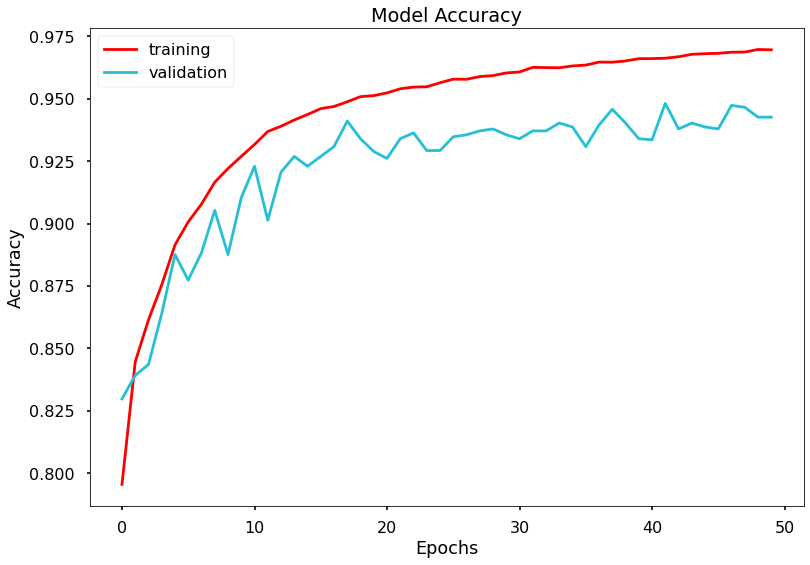

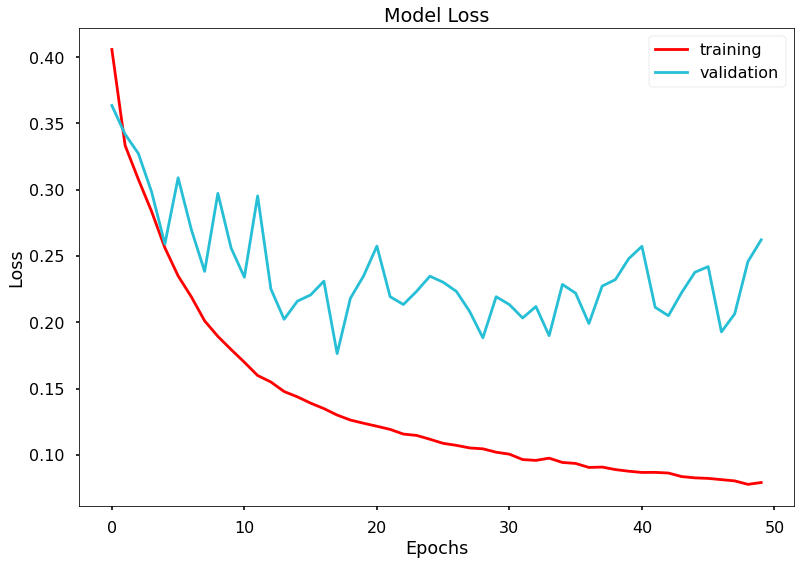

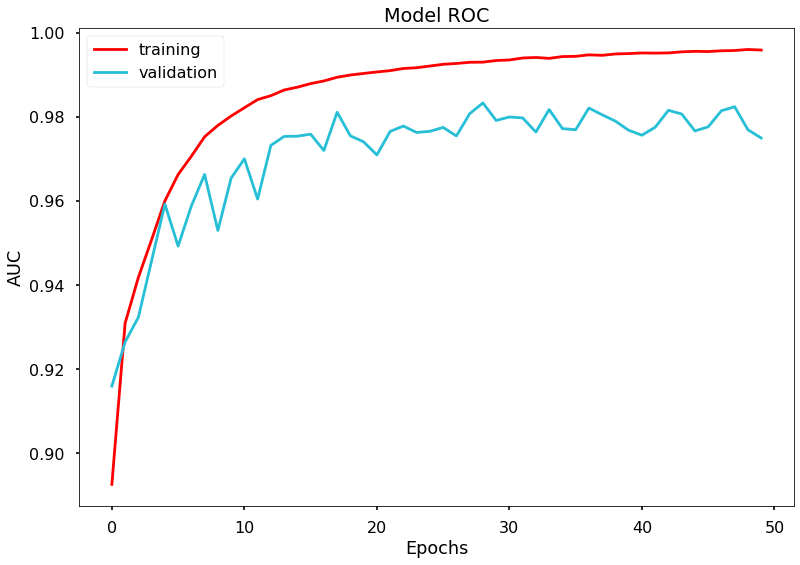

In \[17\]:

    #### EVALUATE USING TEST IMAGES
    score = model.evaluate(X_test,y_test,verbose=0)
    #print('Test Score = ',score[0])
    #print('Test Accuracy =', score[1])

In \[18\]:

    score = model.evaluate(X_test,y_test,verbose=0)
    print('Test Score = ',score[0])
    a=score[1]*100
    print("Test Accuracy ="+"{:.2f}".format(a)+"%");

    Test Score =  0.3104194274646356
    Test Accuracy =93.48%

In \[19\]:

    from sklearn.metrics import accuracy_score
    import seaborn as sns
    import matplotlib.pyplot as plt   
    from sklearn.metrics import confusion_matrix

    y_pred= model.predict_classes(X_test)
    y_pred[1]
    import numpy as np
    y_test_r=np.argmax(y_test, axis=1)
    y_test_r[1]
    #accuracy_score(y_test_r,y_pred)

Out\[19\]:

    1

In \[20\]:

    from sklearn.metrics import roc_curve
    fpr_PD, tpr_PD, thresholds_PD = roc_curve(y_test_r, y_pred)
    from sklearn.metrics import auc
    auc_PD = auc(fpr_PD, tpr_PD)

In \[21\]:

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_PD, tpr_PD, label='ROC Curve (AUC = {:.3f})'.format(auc_PD))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

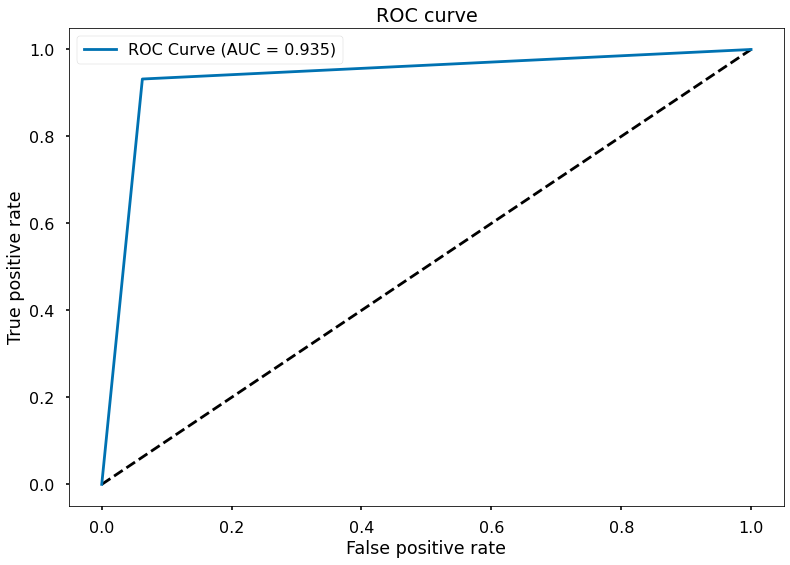

In \[22\]:

    cm = confusion_matrix(y_test_r,y_pred)
    print(cm)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(["Fatigue Subjects","Active Subjects"]); ax.yaxis.set_ticklabels(["Fatigue Subjects","Active Subjects"]);

    [[794  53]
     [ 54 741]]

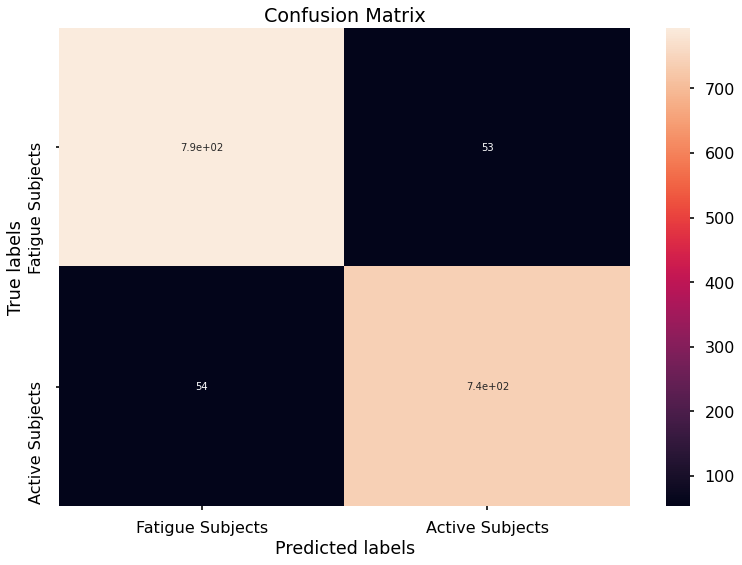

In \[23\]:

    from sklearn.metrics import classification_report
    print(classification_report(y_test_r,y_pred))

                  precision    recall  f1-score   support

               0       0.94      0.94      0.94       847
               1       0.93      0.93      0.93       795

        accuracy                           0.93      1642
       macro avg       0.93      0.93      0.93      1642
    weighted avg       0.93      0.93      0.93      1642

In \[24\]:

    #### SAVE THE TRAINED MODEL 
    pickle_out= open("model_trained.p", "wb")
    pickle.dump(model,pickle_out)
    pickle_out.close()